In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
plt.style.use('fivethirtyeight') #setting matplotlib style


In [3]:
stocksymbols = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']
startdate = date(2019,10,14)
end_date = date.today()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2022-04-11
You have 8 assets in your porfolio


In [4]:
df = pd.DataFrame()
for i in range(len(stocksymbols)):
    data = gh(symbol=stocksymbols[i],start=startdate, end=(end_date))[['Symbol','Close']]
    data.rename(columns={'Close':data['Symbol'][0]},inplace=True)
    data.drop(['Symbol'], axis=1,inplace=True)
    if i == 0:
        df = data
    if i != 0:
        df = df.join(data)
df

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2019-10-14,127.85,455.00,428.85,243.45,485.95,727.75,786.10,1358.00
2019-10-15,126.95,450.00,431.85,243.65,490.30,713.15,768.30,1364.15
2019-10-16,125.85,456.10,435.30,248.90,512.40,700.65,771.45,1372.35
2019-10-17,139.50,462.40,440.60,247.85,513.30,724.30,769.50,1396.50
2019-10-18,136.85,466.50,437.80,248.90,520.30,779.15,767.85,1416.35
...,...,...,...,...,...,...,...,...
2022-04-04,446.75,544.65,746.60,605.60,380.20,832.70,1882.95,2663.70
2022-04-05,458.05,548.95,741.80,599.15,380.00,822.35,1861.10,2626.05
2022-04-06,456.15,541.45,741.60,593.55,385.80,791.95,1828.85,2619.05


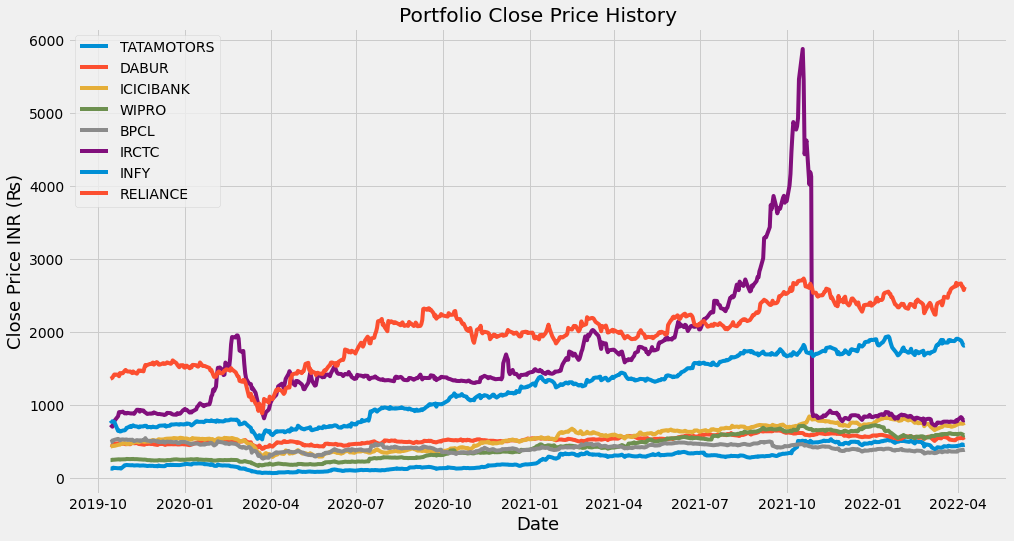

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)

In [7]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
TATAMOTORS,1.000000,0.751927,0.941591,0.907249,0.070482,0.129392,0.906880,0.766800
DABUR,0.751927,1.000000,0.799861,0.910158,0.161340,0.528724,0.882844,0.778490
ICICIBANK,0.941591,0.799861,1.000000,0.902878,0.255088,0.233923,0.879287,0.683718
WIPRO,0.907249,0.910158,0.902878,1.000000,0.079884,0.370699,0.977381,0.846166
BPCL,0.070482,0.161340,0.255088,0.079884,1.000000,0.271909,-0.023764,-0.034739
IRCTC,0.129392,0.528724,0.233923,0.370699,0.271909,1.000000,0.295337,0.308339
INFY,0.906880,0.882844,0.879287,0.977381,-0.023764,0.295337,1.000000,0.880302
RELIANCE,0.766800,0.778490,0.683718,0.846166,-0.034739,0.308339,0.880302,1.000000


Correlation between Stocks in your portfolio


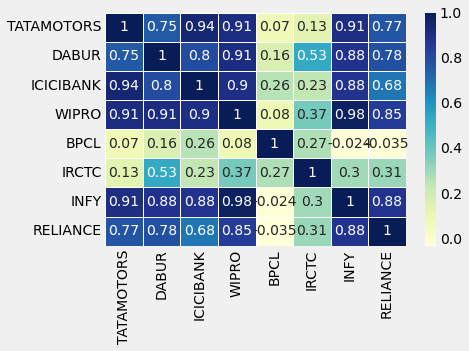

In [8]:
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

In [9]:
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2019-10-15,-0.007039,-0.010989,0.006995,0.000822,0.008952,-0.020062,-0.022643,0.004529
2019-10-16,-0.008665,0.013556,0.007989,0.021547,0.045074,-0.017528,0.004100,0.006011
2019-10-17,0.108462,0.013813,0.012176,-0.004219,0.001756,0.033754,-0.002528,0.017598
2019-10-18,-0.018996,0.008867,-0.006355,0.004236,0.013637,0.075728,-0.002144,0.014214
2019-10-22,-0.037267,0.013076,0.030493,0.018682,0.026523,0.084130,-0.161881,-0.001553
...,...,...,...,...,...,...,...,...
2022-04-04,0.012694,0.004056,0.014058,0.006314,0.015491,0.043222,-0.010822,0.002956
2022-04-05,0.025294,0.007895,-0.006429,-0.010651,-0.000526,-0.012429,-0.011604,-0.014134
2022-04-06,-0.004148,-0.013662,-0.000270,-0.009347,0.015263,-0.036967,-0.017328,-0.002666


Daily simple returns


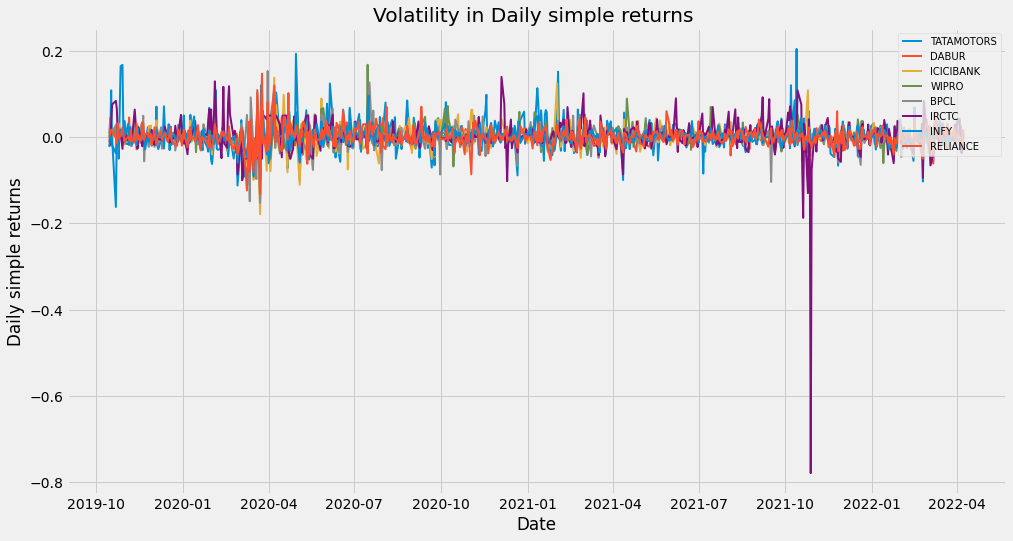

In [10]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

In [11]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
TATAMOTORS    0.264290
DABUR         0.045231
ICICIBANK     0.124443
WIPRO         0.162160
BPCL         -0.006091
IRCTC         0.178072
INFY          0.155867
RELIANCE      0.131003
dtype: float64


<AxesSubplot:title={'center':'Risk Box Plot'}>

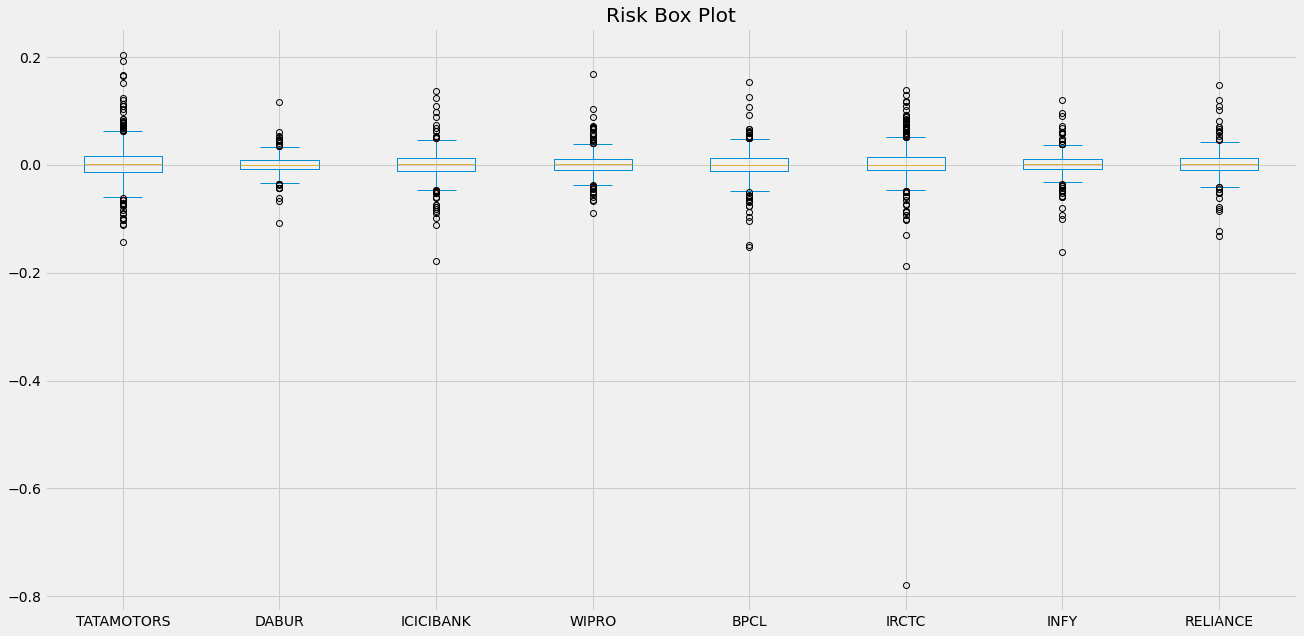

In [12]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


In [13]:
print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)


Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
TATAMOTORS    55.771120
DABUR         25.238338
ICICIBANK     40.831078
WIPRO         32.841907
BPCL          39.835180
IRCTC         69.581644
INFY          32.297769
RELIANCE      35.744642
dtype: float64


In [14]:
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100

TATAMOTORS    0.473883
DABUR         0.179216
ICICIBANK     0.304775
WIPRO         0.493758
BPCL         -0.015291
IRCTC         0.255917
INFY          0.482594
RELIANCE      0.366497
dtype: float64

In [15]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2019-10-15,0.992961,0.989011,1.006995,1.000822,1.008952,0.979938,0.977357,1.004529
2019-10-16,0.984357,1.002418,1.015040,1.022387,1.054429,0.962762,0.981364,1.010567
2019-10-17,1.091122,1.016264,1.027399,1.018074,1.056282,0.995259,0.978883,1.028351
2019-10-18,1.070395,1.025275,1.020870,1.022387,1.070686,1.070629,0.976784,1.042968
2019-10-22,1.030504,1.038681,1.052000,1.041487,1.099084,1.160701,0.818662,1.041348
...,...,...,...,...,...,...,...,...
2022-04-04,3.494329,1.197033,1.740935,2.487574,0.782385,1.144212,2.395306,1.961487
2022-04-05,3.582714,1.206484,1.729742,2.461080,0.781973,1.129990,2.367510,1.933763
2022-04-06,3.567853,1.190000,1.729276,2.438078,0.793909,1.088217,2.326485,1.928608


Cummulative Returns


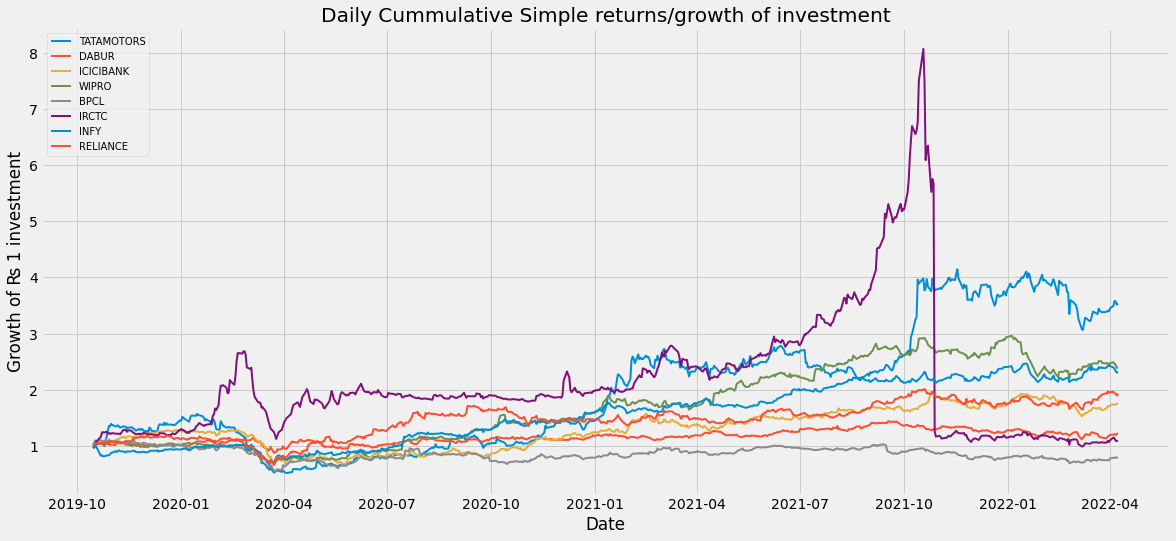

In [16]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)